# Part 1

### Importing the nesseccary libraries 

In [9]:
from Bio import SeqIO
import re
import pandas as pd

### Fetshing the files to be used, iterating over it to find all the lengths of the elements required then devide it by the length of the sequence it belongs to -in order to get its ratio-, after all the interation, we take the average of these values to get the average value of each nucleotide

In [12]:
A_content=[]
G_content=[]
T_content=[]
C_content=[]

delta_consensus_seq_file=pd.read_csv("Consensus_Seq.fasta",header=None)

delta_consensus_seq= delta_consensus_seq_file[0][0]
consensus=""

for n in delta_consensus_seq:
    if n!="N":
        consensus+=n

len_consensus=len(consensus)
all_As_consensus=len(re.findall(r"A",consensus))
all_Ts_consensus=len(re.findall(r"T",consensus))    
all_Cs_consensus=len(re.findall(r"C",consensus))
all_Gs_consensus=len(re.findall(r"G",consensus))

Avg_consensus_A_content_percent=(all_As_consensus/len_consensus)*100
Avg_consensus_C_content_percent=(all_Cs_consensus/len_consensus)*100
Avg_consensus_G_content_percent=(all_Gs_consensus/len_consensus)*100
Avg_consensus_T_content_percent=(all_Ts_consensus/len_consensus)*100
Avg_consensus_CG_content_percent= Avg_consensus_C_content_percent+Avg_consensus_G_content_percent


print("the average A content in delta: ",Avg_consensus_A_content_percent)
print("the average C content in delta: ",Avg_consensus_C_content_percent)
print("the average G content in delta: ",Avg_consensus_G_content_percent)
print("the average T content in delta: ",Avg_consensus_T_content_percent)
print("the average CG content in delta: ",Avg_consensus_CG_content_percent)

the average A content in delta:  29.83000586186683
the average C content in delta:  18.29247267335609
the average G content in delta:  19.547601806834248
the average T content in delta:  32.28509361746147
the average CG content in delta:  37.84007448019034


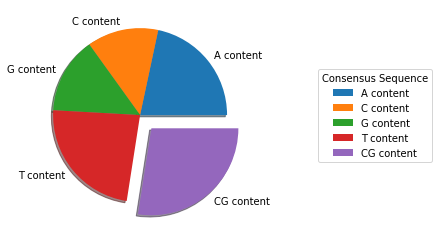

In [42]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Avg_consensus_A_content_percent, Avg_consensus_C_content_percent, Avg_consensus_G_content_percent, Avg_consensus_T_content_percent,Avg_consensus_CG_content_percent ])
mylabels = ["A content","C content","G content","T content","CG content"]

myexplode = [0, 0, 0, 0,0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend(title = "Consensus Sequence", bbox_to_anchor=(1.2,0.5),loc="center right",bbox_transform=plt.gcf().transFigure)
plt.show()

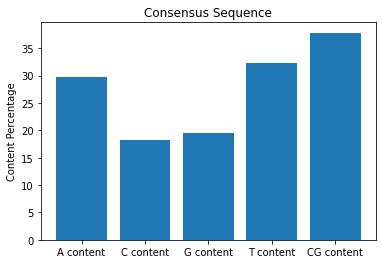

In [45]:
plt.bar(mylabels, y)
 
# setting y_label as price
plt.ylabel("Content Percentage")  
plt.title("Consensus Sequence")
plt.show()

### Repeating the same process for the omicron data:

In [47]:
omicron_data= "OmicronGhana.fasta"

A_content_omicron=[]
G_content_omicron=[]
T_content_omicron=[]
C_content_omicron=[]
CG_content_omicron=[]

seq_data=[]
for seq_record in SeqIO.parse(omicron_data, "fasta"):
    seq=str(seq_record.seq)
    
    all_As=re.findall(r"A",seq)
    A_content_omicron.append((len(all_As)/len(seq)))
    
    all_Cs=re.findall(r"C",seq)
    C_content_omicron.append((len(all_Cs)/len(seq)))
    
    all_Gs=re.findall(r"G",seq)
    G_content_omicron.append((len(all_Gs)/len(seq)))
    
    all_Ts=re.findall(r"T",seq)
    T_content_omicron.append((len(all_Ts)/len(seq)))
    

Avg_omicron_A_content_percent=(sum(A_content_omicron[:10])/10)*100
Avg_omicron_C_content_percent=(sum(C_content_omicron[:10])/10)*100
Avg_omicron_G_content_percent=(sum(G_content_omicron[:10])/10)*100
Avg_omicron_T_content_percent=(sum(T_content_omicron[:10])/10)*100
Avg_omicron_CG_content_percent= Avg_omicron_C_content_percent+Avg_omicron_G_content_percent


print("the average A content in omicron: ",Avg_omicron_A_content_percent)
print("the average C content in omicron: ",Avg_omicron_C_content_percent)
print("the average G content in omicron: ",Avg_omicron_G_content_percent)
print("the average T content in omicron: ",Avg_omicron_T_content_percent)
print("the average CG content in omicron: ",Avg_omicron_CG_content_percent)

the average A content in omicron:  29.51261297235775
the average C content in omicron:  18.074339322571362
the average G content in omicron:  19.37441362672501
the average T content in omicron:  31.779675412785707
the average CG content in omicron:  37.44875294929637


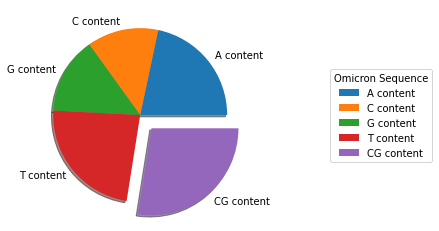

In [49]:
import matplotlib.pyplot as plt
import numpy as np

yo = np.array([Avg_omicron_A_content_percent, Avg_omicron_C_content_percent, Avg_omicron_G_content_percent, Avg_omicron_T_content_percent,Avg_omicron_CG_content_percent ])
mylabelso = ["A content","C content","G content","T content","CG content"]

myexplode = [0, 0, 0, 0,0.2]

plt.pie(yo, labels = mylabelso, explode = myexplode, shadow = True)
plt.legend(title = "Omicron Sequence", bbox_to_anchor=(1.2,0.5),loc="center right",bbox_transform=plt.gcf().transFigure)
plt.show()

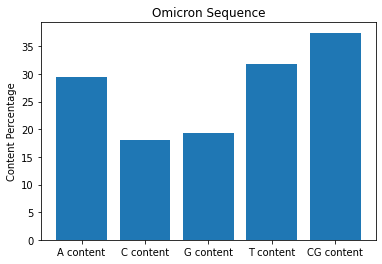

In [51]:
plt.bar(mylabelso, yo)
 
# setting y_label as price
plt.ylabel("Content Percentage")  
plt.title("Omicron Sequence")
plt.show()

# Part 2 

### Importing the nesseccary libraries

In [4]:
import re
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import motifs

### Creating fasta file for the first 10 seqs of delta

In [5]:
saveFasta=open(r'New10DeltaSeq.fasta','w+')
i=0
for seq_record in SeqIO.parse("DeltaGhana.fasta", "fasta"):
    if i<=9:
        # Save Data inside file
        saveFasta.write(">"+str(seq_record.id)+ "\n" +str(seq_record.seq) +"\n")
        i+=1
# Close the file and save it 
saveFasta.close()

In [6]:
# Print the 10 Seqs of delta
for seq_record in SeqIO.parse("New10DeltaSeq.fasta", "fasta"):
    print(seq_record.id) #seq_record is of type sequence record
    print(repr(seq_record.seq)) 
    print(len(seq_record))


hCoV-19/Ghana/NMIMR-NCOV-21-57079/2021|EPI_ISL_8065860|2021-10-04
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NCOV-21-57083/2021|EPI_ISL_8065876|2021-10-06
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTTGCTGTCACTCGGCTGCAT...AAT')
29601
hCoV-19/Ghana/NMIMR-NCOV-21-57078/2021|EPI_ISL_8065881|2021-10-08
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NUR-21-33307/2021|EPI_ISL_8065891|2021-10-09
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NCOV-21-57053/2021|EPI_ISL_8065900|2021-10-11
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NCOV-21-58250/2021|EPI_ISL_8065904|2021-10-12
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29604
hCoV-19/Ghana/NMIMR-NCOV-21-58758/2021|EPI_ISL_8065913|2021-10-15
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-C

###  Creating fasta file for the first 10 seqs of Omicron

In [7]:
saveFasta=open(r'New10OmicronSeq.fasta','w+')
i=0
for seq_record in SeqIO.parse("OmicronGhana.fasta", "fasta"):
    if i<=9:
        # Save Data inside file
        saveFasta.write(">"+str(seq_record.id)+ "\n" +str(seq_record.seq) +"\n")
        i+=1
# Close the file and save it
saveFasta.close()

In [8]:
# Print the 10 Omicron Seqs
for seq_record in SeqIO.parse("New10OmicronSeq.fasta", "fasta"):
    print(seq_record.id) #seq_record is of type sequence record
    print(repr(seq_record.seq)) 
    print(len(seq_record))

hCoV-19/Ghana/TRA-2298/2021|EPI_ISL_6939033|2021-11-25
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')
29684
hCoV-19/Ghana/TRA-2303/2021|EPI_ISL_6939034|2021-11-25
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')
29684
hCoV-19/Ghana/TRA-2342/2021|EPI_ISL_6939036|2021-11-26
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')
29684
hCoV-19/Ghana/TRA-2366/2021|EPI_ISL_7661095|2021-11-28
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...TCC')
29746
hCoV-19/Ghana/NMIMR-NCOV-21-60354/2021|EPI_ISL_8065961|2021-11-22
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')
29684
hCoV-19/Ghana/NMIMR-NCOV-21-60454/2021|EPI_ISL_8065963|2021-11-25
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')
29686
hCoV-19/Ghana/NMIMR-NCOV-21-60738/2021|EPI_ISL_8065967|2021-12-07
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...GAA')
29684
hCoV-19/Ghana/NMIMR-NCOV-21-60809/2021|EPI_ISL_8065971|2021-12-0

### Creating fasta file for the all 20 seqs of Delta and Omicron

In [9]:
All20 = []
saveFasta=open(r'All20.fasta','w+')

# Save Delta Seqs
for seq_record in SeqIO.parse("New10DeltaSeq.fasta", "fasta"):
        saveFasta.write(">"+str(seq_record.id)+ "\n" +str(seq_record.seq) +"\n")

#  Save Omicron Seqs
for seq_record in SeqIO.parse("New10OmicronSeq.fasta", "fasta"):
        saveFasta.write(">"+str(seq_record.id)+ "\n" +str(seq_record.seq) +"\n")

# Close the file and save it
saveFasta.close()

In [10]:
# Print all 20 seqs
for seq_record in SeqIO.parse("All20.fasta", "fasta"):
    print(seq_record.id) #seq_record is of type sequence record
    print(repr(seq_record.seq)) 
    print(len(seq_record))

hCoV-19/Ghana/NMIMR-NCOV-21-57079/2021|EPI_ISL_8065860|2021-10-04
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NCOV-21-57083/2021|EPI_ISL_8065876|2021-10-06
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTTGCTGTCACTCGGCTGCAT...AAT')
29601
hCoV-19/Ghana/NMIMR-NCOV-21-57078/2021|EPI_ISL_8065881|2021-10-08
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NUR-21-33307/2021|EPI_ISL_8065891|2021-10-09
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NCOV-21-57053/2021|EPI_ISL_8065900|2021-10-11
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-NCOV-21-58250/2021|EPI_ISL_8065904|2021-10-12
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29604
hCoV-19/Ghana/NMIMR-NCOV-21-58758/2021|EPI_ISL_8065913|2021-10-15
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29598
hCoV-19/Ghana/NMIMR-C

### Making the Consensus Seq from 10 delta seqs

In [11]:
# print data about the alligned 10 delta sequences after generating it by mega software. 
for seq_record in SeqIO.parse("AllignedDelta.fas", "fasta"):
    print(seq_record.id) #seq_record is of type sequence record
    print(repr(seq_record.seq)) 
    print(len(seq_record))


hCoV-19/Ghana/NMIMR-NCOV-21-57079/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-NCOV-21-57083/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTTGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-NCOV-21-57078/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-NUR-21-33307/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-NCOV-21-57053/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-NCOV-21-58250/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-NCOV-21-58758/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-CT-21-19713/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...AAT')
29611
hCoV-19/Ghana/NMIMR-CT-21-19740/2021|EPI
Seq('AGATCTGTTCTCTAAACGAAC

In [12]:
# Save the 10 Alligned Delta seq in list

seq_list=[]

for seq_record in SeqIO.parse("AllignedDelta.fas", "fasta"):
    seqR=str(seq_record.seq)
    seq_list.append(seqR)

print(seq_list)

['AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAAT

In [13]:
# Creat the consensus seq

from collections import Counter

consensus_seq = ""

for i in zip(*seq_list):
    consensus_seq += next(iter(Counter(i)))
    
print(consensus_seq)


AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTT

### Get the dismillar regions between consensus seq and the case seqs

In [14]:
# Print data about alligned 10 case seqs with 1 consensus seq after generating it with mega software
for seq_record in SeqIO.parse("NewCaseConsensus(alligned).fas", "fasta"):
    print(seq_record.id) #seq_record is of type sequence record
    print(repr(seq_record.seq)) 
    print(len(seq_record))

hCoV-19/Ghana/TRA-2298/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...-AA')
29954
hCoV-19/Ghana/TRA-2303/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...-AA')
29954
hCoV-19/Ghana/TRA-2342/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...-AA')
29954
hCoV-19/Ghana/TRA-2366/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...TCC')
29953
hCoV-19/Ghana/NMIMR-NCOV-21-60354/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...-AA')
29954
hCoV-19/Ghana/NMIMR-NCOV-21-60454/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...--A')
29953
hCoV-19/Ghana/NMIMR-NCOV-21-60738/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...-AA')
29954
hCoV-19/Ghana/NMIMR-NCOV-21-60809/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...-AA')
29954
hCoV-19/Ghana/NMIMR-NUR-21-35969/2021|EPI
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...--A'

In [15]:
# Save the first 10 seq of the alligned file in cae seq list and the 11 in the consensus list
case_seq_list = []
i =0
for seq_record in SeqIO.parse("NewCaseConsensus(alligned).fas", "fasta"):
    if i < 9:
        case_seq_list.append(seq_record.seq)
        print(seq_record.id)
    else:
        Consensus = seq_record.seq
        print(seq_record.id)
    i+=1

hCoV-19/Ghana/TRA-2298/2021|EPI
hCoV-19/Ghana/TRA-2303/2021|EPI
hCoV-19/Ghana/TRA-2342/2021|EPI
hCoV-19/Ghana/TRA-2366/2021|EPI
hCoV-19/Ghana/NMIMR-NCOV-21-60354/2021|EPI
hCoV-19/Ghana/NMIMR-NCOV-21-60454/2021|EPI
hCoV-19/Ghana/NMIMR-NCOV-21-60738/2021|EPI
hCoV-19/Ghana/NMIMR-NCOV-21-60809/2021|EPI
hCoV-19/Ghana/NMIMR-NUR-21-35969/2021|EPI
Consensus


In [16]:
# Function to get the dissmillar regions

from collections import Counter

def get_dissmillar(a, b, percentage=70):
    d = {}
    for i, chars in enumerate(zip(*a)):
        cntr = Counter(chars)
        char, rpts = cntr.most_common(1)[0]
        if (rpts/cntr.total()*100) >= percentage and char != b[i]:
            d[i] = char, b[i]
    return d

In [17]:
# get the dismillar between the 10 case seqs and consensus seq with percentage 100%
dissmillar_regions = get_dissmillar(case_seq_list, Consensus,100)
dissmillar_regions

{155: ('G', 'T'),
 1075: ('G', 'N'),
 1076: ('A', 'N'),
 1140: ('T', 'N'),
 1141: ('G', 'N'),
 1142: ('A', 'N'),
 1143: ('A', 'N'),
 1144: ('T', 'N'),
 1145: ('G', 'N'),
 1146: ('C', 'N'),
 1147: ('A', 'N'),
 1148: ('A', 'N'),
 1149: ('C', 'N'),
 1150: ('C', 'N'),
 1151: ('A', 'N'),
 1152: ('A', 'N'),
 1153: ('A', 'N'),
 1154: ('T', 'N'),
 1155: ('G', 'N'),
 1156: ('T', 'N'),
 1157: ('G', 'N'),
 1158: ('C', 'N'),
 1159: ('C', 'N'),
 1160: ('T', 'N'),
 1161: ('T', 'N'),
 1162: ('T', 'N'),
 1163: ('C', 'N'),
 1164: ('A', 'N'),
 1165: ('A', 'N'),
 1166: ('C', 'N'),
 1167: ('T', 'N'),
 1168: ('C', 'N'),
 1169: ('T', 'N'),
 1170: ('C', 'N'),
 1171: ('A', 'N'),
 1172: ('T', 'N'),
 1173: ('G', 'N'),
 1174: ('A', 'N'),
 1175: ('A', 'N'),
 1176: ('G', 'N'),
 1177: ('T', 'N'),
 1178: ('G', 'N'),
 1179: ('T', 'N'),
 1180: ('G', 'N'),
 1181: ('A', 'N'),
 1182: ('T', 'N'),
 1183: ('C', 'N'),
 1184: ('A', 'N'),
 1185: ('T', 'N'),
 1186: ('T', 'N'),
 1187: ('G', 'N'),
 1188: ('T', 'N'),
 1189: ('G', 

In [18]:
# show dissimillar regions in data frame

import pandas as pd

data_items = dissmillar_regions.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)

df = df.rename(columns={0: 'Index', 1: 'Dissimilar Regions'})

df

,Index,Dissimilar Regions
0,155,"(G, T)"
1,1075,"(G, N)"
2,1076,"(A, N)"
3,1140,"(T, N)"
4,1141,"(G, N)"
...,...,...
690,29869,"(T, -)"
691,29872,"(A, -)"
692,29873,"(G, -)"
693,29874,"(T, -)"


In [19]:
# Save Data frame as csv file

df.to_csv('Dissimilar_Regions.csv')